# Python - Exploratory Data Analysis


Name: Custodio, Louise Angela G.  
Section: 2ECE-D  
Date and Time Started: October 23, 2024, 10:15 AM  
Date and Time Ended: October 30, 2024, 3:08 AM  


**Exploratory Data Analysis (EDA)** is a process of analyzing and summarizing datasets to identify patterns, trends, and relationships using visual and statistical methods. It helps in understanding the data's structure and guiding further analysis.

In this Jupyter Notebook, an Exploratory Data Analysis (EDA) is performed on the **Most Streamed Spotify Songs 2023** dataset, sourced from [Kaggle](https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023). 

#### Objectives

- **Dataset Familiarization:** Explore the structure of the dataset, including data types and missing values.
- **Summary Statistics:** Generate descriptive statistics for key metrics such as the number of streams, release years, and musical attributes (e.g., BPM, danceability).
- **Data Visualization:** Utilize various visualizations (e.g., bar charts, histograms, scatter plots) to uncover trends and patterns in the data.
- **Correlation Analysis:** Examine correlations between different variables and assess how musical characteristics impact stream counts.
- **Insights and Recommendations:** Provide insights regarding popular tracks, artists, and potential trends within the music industry.

In [70]:
# Import the Pandas library
import pandas as pd

In [71]:
# Load the data from the CSV file
spotify_data = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')

# Print or display the results
spotify_data

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


## Overview of Dataset

#### • How many rows and columns does the dataset contain?


In [74]:
# Get the number of rows and columns by using the .shape function
rows, cols = spotify_data.shape

# Print the results 
print('Rows:', rows)
print('Columns:', cols)

Rows: 953
Columns: 24


#### • What are the data types of each column? Are there any missing values?


In [76]:
# Get the data types of each column
data_types = spotify_data.dtypes

# Print the results
print("Data Types of Each Column:")
print(data_types)

# Check for missing values
missing_values = spotify_data.isnull().sum()

# Display missing values for columns with missing data
print("\nMissing Values in Each Column:")
print(missing_values[missing_values > 0])  

Data Types of Each Column:
track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

Missing Values in Each Column:
in_shazam_charts    50
key                 95
dtype: int64


## Basic Descriptive Statistics


#### • What are the mean, median, and standard deviation of the streams column?


In [79]:
#Convert the streams column to numeric, setting non-numeric values to NaN
spotify_data['streams'] = pd.to_numeric(spotify_data['streams'], errors='coerce')

#Remove rows with NaN in the streams column
spotify_data.dropna(subset=['streams'], inplace=True)

#Calculate the mean of the streams column
spd_mean = spotify_data['streams'].mean()

#Calculate the median of the streams column
spd_mid = spotify_data['streams'].median()

#Calculate the standard deviation of the streams column
spd_sd = spotify_data['streams'].std()

#Print the results of the mean, median, and standard deviation
print('Mean of the Streams:', spd_mean)
print('Median of the Streams:', spd_mid)
print('Standard Deviation of the Streams:', spd_sd)

Mean of the Streams: 514137424.93907565
Median of the Streams: 290530915.0
Standard Deviation of the Streams: 566856949.0388832


#### • What is the distribution of released_year and artist_count? Are there any noticeable trends or outliers?

In [81]:
#Import the Matplot and Seaborn Library
import matplotlib.pyplot as plt
import seaborn as sns

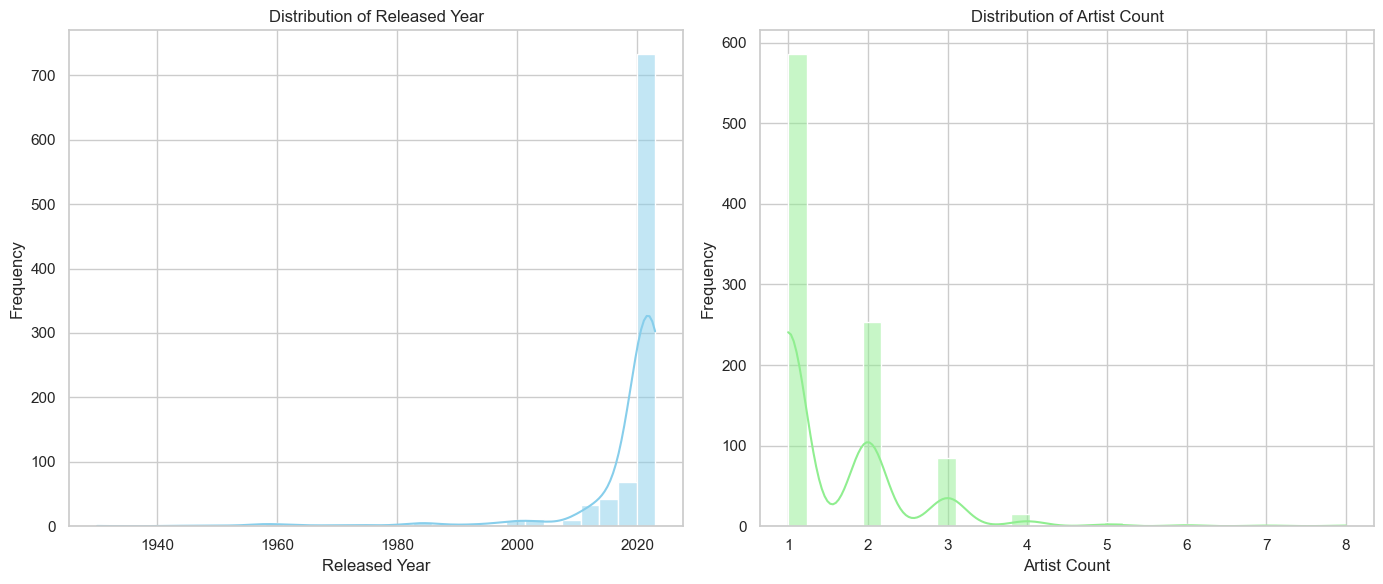

In [82]:
# Set Seaborn style
sns.set(style='whitegrid')

# Plot distribution of 'released_year'
plt.figure(figsize=(14, 6))

# Histogram for released_year
plt.subplot(1, 2, 1)
sns.histplot(spotify_data['released_year'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Released Year')
plt.xlabel('Released Year')
plt.ylabel('Frequency')

# Histogram for artist_count
plt.subplot(1, 2, 2)
sns.histplot(spotify_data['artist_count'], bins=30, kde=True, color='lightgreen')
plt.title('Distribution of Artist Count')
plt.xlabel('Artist Count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



##  Top Performers


#### • Which track has the highest number of streams? Display the top 5 most streamed tracks.


In [85]:
#Get top 5 tracks by sorting streams in descending order and reset index
top_5_tracks = spotify_data.sort_values(by='streams', ascending=False).head(5).reset_index()

#Display the result
top_5_tracks[['track_name', 'streams']]

,track_name,streams
0,Blinding Lights,3.703895e+09
1,Shape of You,3.562544e+09
2,Someone You Loved,2.887242e+09
3,Dance Monkey,2.864792e+09
4,Sunflower - Spider-Man: Into the Spider-Verse,2.808097e+09


#### • Who are the top 5 most frequent artists based on the number of tracks in the dataset?

In [87]:
#Group by the artist(s)_name column and count the occurrences
grp = spotify_data['artist(s)_name'].value_counts().head(5).reset_index()

#Convert the grouped data into a new DataFrame
top_5_freqarts = pd.DataFrame(grp)

#Rename columns to make them more descriptive
top_5_freqarts = top_5_freqarts.rename(columns={'index': 'artist(s)_name'})

#Display the results
top_5_freqarts

,artist(s)_name,count
0,Taylor Swift,34
1,The Weeknd,22
2,Bad Bunny,19
3,SZA,19
4,Harry Styles,17


## Temporal Trends


• Analyze the trends in the number of tracks released over time. Plot the number of tracks released per year.


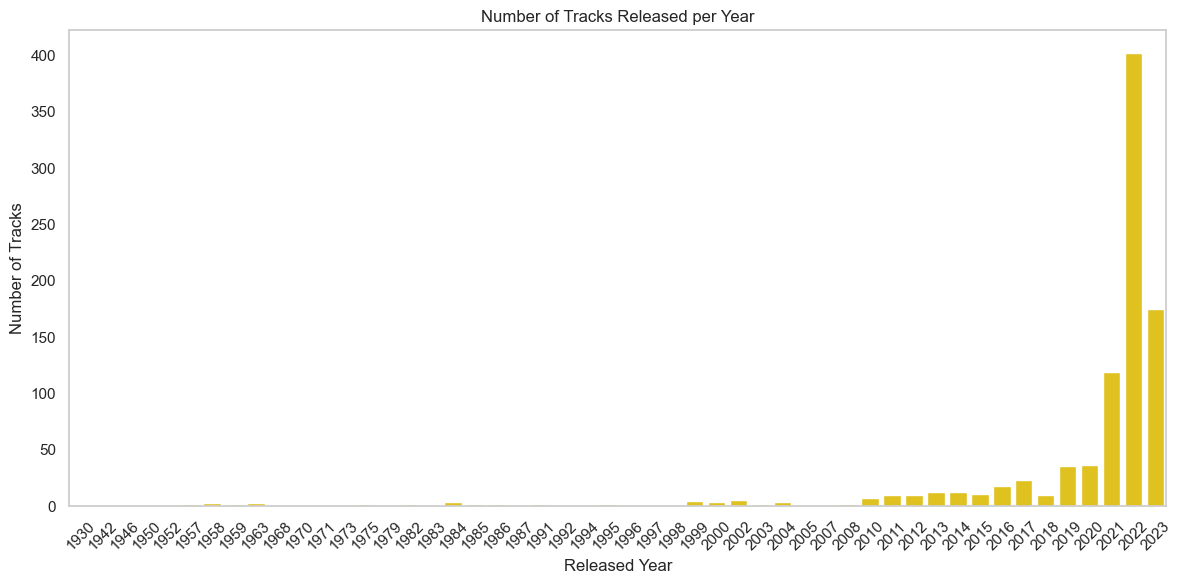

In [90]:
# Count the number of tracks released each year from the dataset.
tracks_per_year = spotify_data['released_year'].value_counts().reset_index()

# Create a new DataFrame with columns for released year and track count.
tracks_per_year.columns = ['released_year', 'track_count']

# Sort the DataFrame by released year
tracks_per_year = tracks_per_year.sort_values(by='released_year')

# Set up a figure for plotting
plt.figure(figsize=(12, 6))

# Create a bar plot to visualize the number of tracks per year
sns.barplot(data=tracks_per_year, x='released_year', y='track_count', color='gold')

# Add title and labels to the plot
plt.title('Number of Tracks Released per Year')
plt.xlabel('Released Year')
plt.ylabel('Number of Tracks')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45) 
plt.grid(axis='y')

# Display the plot
plt.tight_layout()
plt.show()

• Does the number of tracks released per month follow any noticeable patterns? Which month sees the most releases?


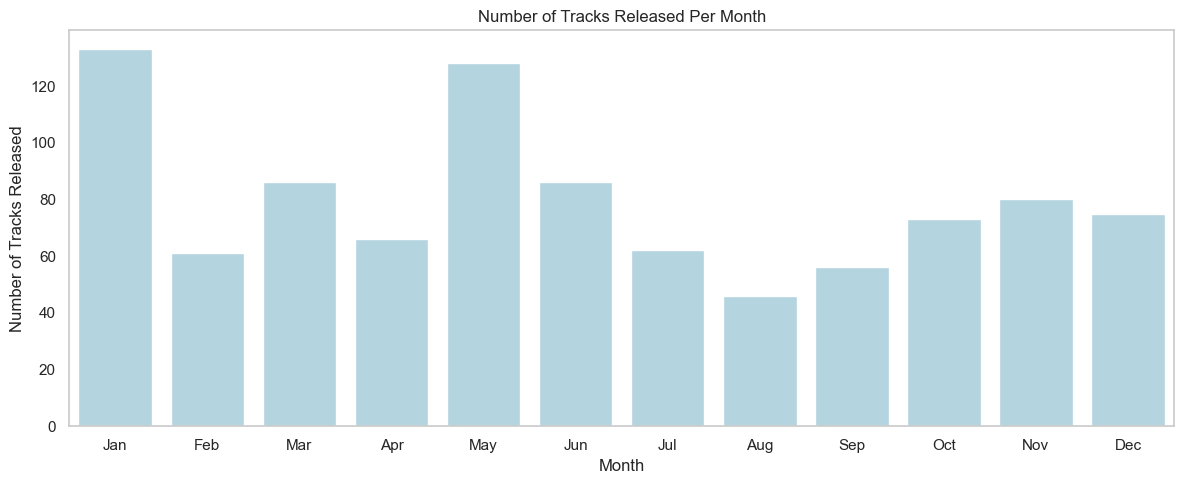

Month with the most releases: Jan ( 133 tracks)


In [92]:
# Convert the column to string type
spotify_data['released_month'] = spotify_data['released_month'].astype(str)

# Count the number of tracks released per month
tracks_per_month = spotify_data['released_month'].value_counts().sort_index()

# Convert month strings to integers and sort them
month_mapping = {str(i): i for i in range(0, 13)}
tracks_per_month.index = tracks_per_month.index.map(month_mapping)

# Sort by month
tracks_per_month = tracks_per_month.sort_index()

# Plotting the trends
plt.figure(figsize=(12, 5))
sns.barplot(x=tracks_per_month.index, y=tracks_per_month.values, color='LightBlue')
plt.title('Number of Tracks Released Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Tracks Released')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Month names list
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Get the month index with max releases
most_releases_month = tracks_per_month.idxmax()  

# Get the count of max releases
most_releases_count = tracks_per_month.max()  

# Print the month with the most releases
print('Month with the most releases:', month_names[most_releases_month - 1], '(', most_releases_count, 'tracks)')


## Genre and Music Characteristics

• Examine the correlation between streams and musical attributes like bpm, danceability_%, and energy_%. Which attributes seem to influence streams the most?

Correlation of streams with each attribute:
streams           1.000000
bpm              -0.002438
energy_%         -0.026051
danceability_%   -0.105457
Name: streams, dtype: float64


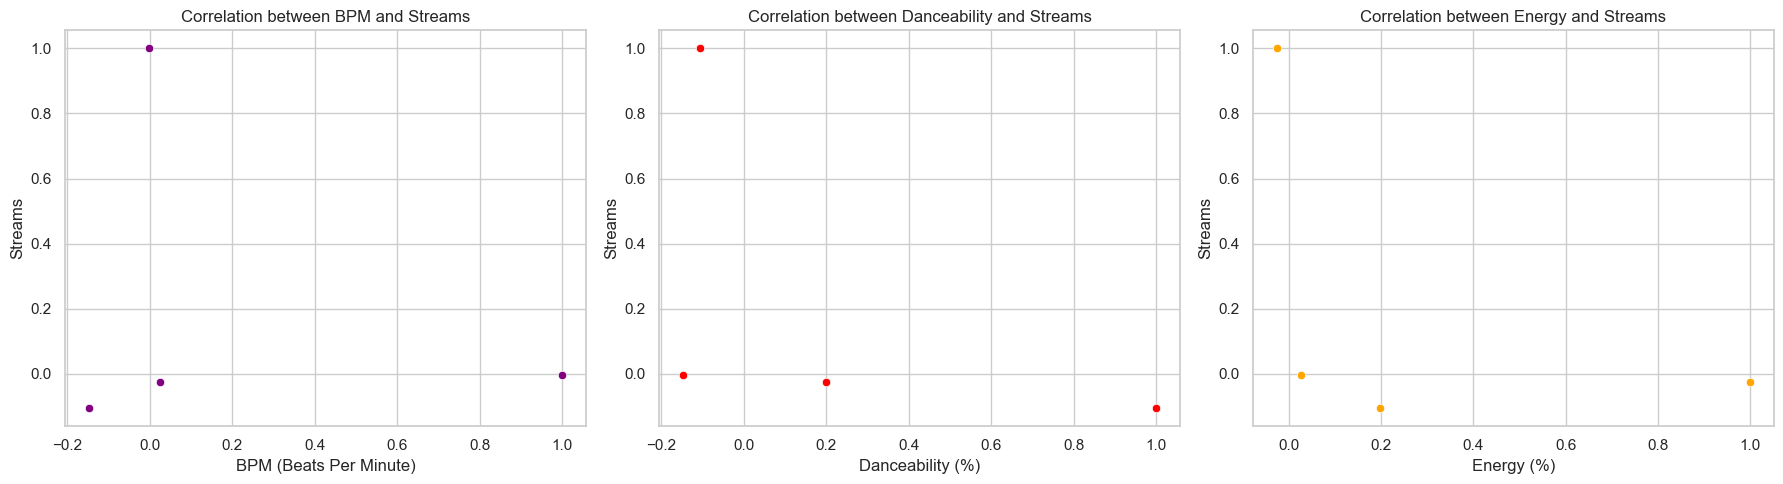

In [95]:
# Specify the attributes for correlation analysis
attributes = ['streams', 'bpm', 'danceability_%', 'energy_%']
correlation_data = spotify_data[attributes].corr()

# Display correlation of streams with each attribute
print("Correlation of streams with each attribute:")
print(correlation_data['streams'].sort_values(ascending=False))

# Set up the figure size 
plt.figure(figsize=(18, 5))

# Scatter plot for BPM vs Streams
plt.subplot(1, 3, 1)
sns.scatterplot(data=correlation_data, x='bpm', y='streams', color='purple')
plt.title('Correlation between BPM and Streams')
plt.xlabel('BPM (Beats Per Minute)')
plt.ylabel('Streams')

# Scatter plot for Danceability vs Streams
plt.subplot(1, 3, 2)
sns.scatterplot(data=correlation_data, x='danceability_%', y='streams', color='red')
plt.title('Correlation between Danceability and Streams')
plt.xlabel('Danceability (%)')
plt.ylabel('Streams')

# Scatter plot for Energy vs Streams
plt.subplot(1, 3, 3)
sns.scatterplot(data=correlation_data, x='energy_%', y='streams', color='orange')
plt.title('Correlation between Energy and Streams')
plt.xlabel('Energy (%)')
plt.ylabel('Streams')

# Adjust layout for better visualization
plt.tight_layout()

# Display the results of plots
plt.show()

• Is there a correlation between danceability_% and energy_%? How about valence_% and acousticness_%?


Correlation between danceability_% and energy_%:
0.19848488212205886
Correlation between valence_% and acousticness_%:
-0.08116130726708855


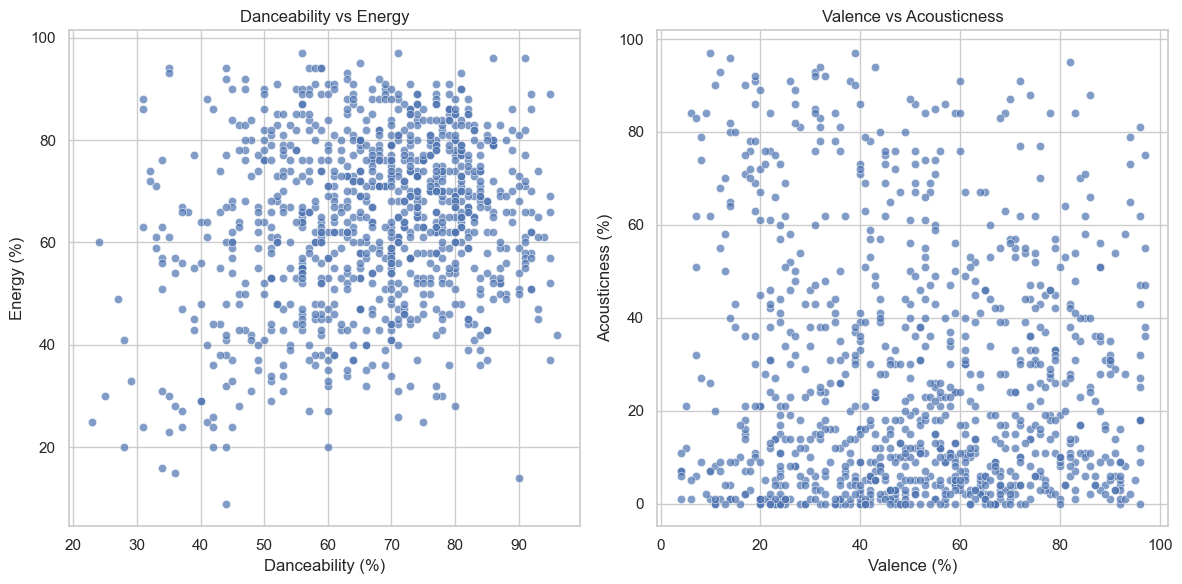

In [97]:
# Define the attributes of interest for correlation analysis
attributes = ['danceability_%', 'energy_%', 'valence_%', 'acousticness_%']

# Calculate the correlation matrix for the selected attributes
correlation_matrix = spotify_data[attributes].corr()

# Display correlations between the specific pairs
print("Correlation between danceability_% and energy_%:")
print(correlation_matrix.loc['danceability_%', 'energy_%'])

print("Correlation between valence_% and acousticness_%:")
print(correlation_matrix.loc['valence_%', 'acousticness_%'])

# Set Seaborn as sns with the style of whitegrid
sns.set(style='whitegrid')

# Create a figure with subplots
plt.figure(figsize=(12, 6))

# Scatter plot for danceability_% and energy_%
plt.subplot(1, 2, 1)
sns.scatterplot(data=spotify_data, x='danceability_%', y='energy_%', alpha=0.7)
plt.title('Danceability vs Energy')
plt.xlabel('Danceability (%)')
plt.ylabel('Energy (%)')

# Scatter plot for valence_% and acousticness_%
plt.subplot(1, 2, 2)
sns.scatterplot(data=spotify_data, x='valence_%', y='acousticness_%', alpha=0.7)
plt.title('Valence vs Acousticness')
plt.xlabel('Valence (%)')
plt.ylabel('Acousticness (%)')

# Show the plots
plt.tight_layout()
plt.show()

## Platform Popularity


• How do the numbers of tracks in spotify_playlists, spotify_charts, and apple_playlists compare? Which platform seems to favor the most popular tracks?


In [100]:
# Calculate the total number of tracks included in different playlists and charts
spotify_playlists_count = spotify_data['in_spotify_playlists'].sum()
spotify_charts_count = spotify_data['in_spotify_charts'].sum()
apple_playlists_count = spotify_data['in_apple_playlists'].sum()

# Print track counts for each platform
print("Spotify Playlists Track Count:", spotify_playlists_count)
print("Spotify Charts Track Count:", spotify_charts_count)
print("Apple Playlists Track Count:", apple_playlists_count)

# Determine and print the platform with the highest track count using elif
if spotify_playlists_count > spotify_charts_count and spotify_playlists_count > apple_playlists_count:
    most_favored_platform = "Spotify Playlists"
elif spotify_charts_count > apple_playlists_count:
    most_favored_platform = "Spotify Charts"
else:
    most_favored_platform = "Apple Playlists"

# Print the results of most popular tracks
print("\nPlatform with the most popular tracks:", most_favored_platform)

Spotify Playlists Track Count: 4952842
Spotify Charts Track Count: 11445
Apple Playlists Track Count: 64609

Platform with the most popular tracks: Spotify Playlists


## Advanced Analysis



• Based on the streams data, can you identify any patterns among tracks with the same key or mode (Major vs. Minor)?


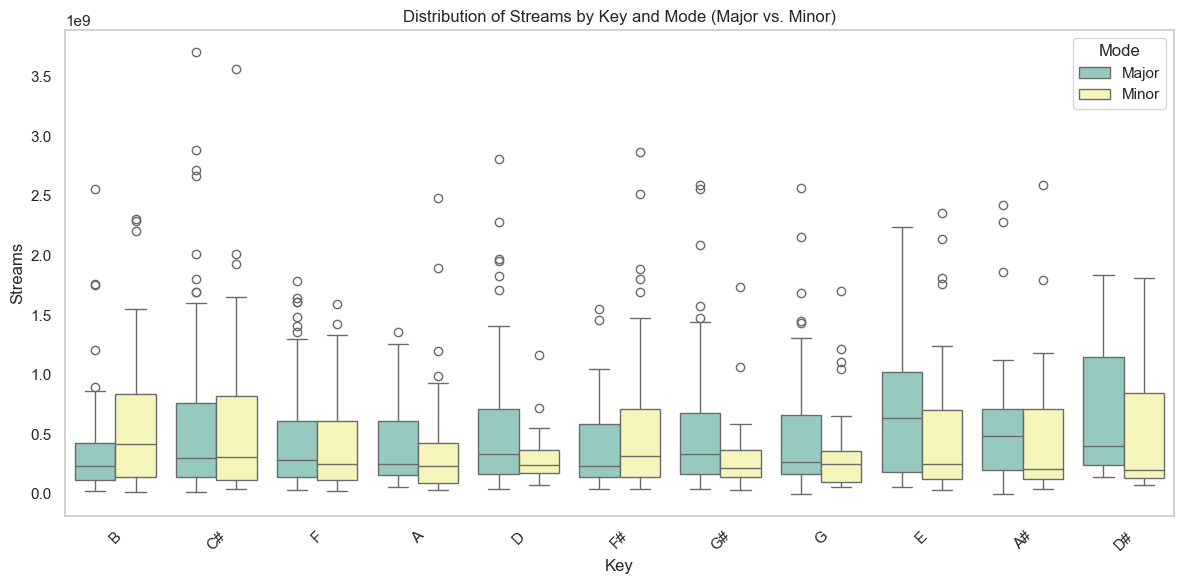

In [103]:
# Set the figure size for the plot
plt.figure(figsize=(12, 6))

# Create a box plot to show the distribution of streams by key and mode
sns.boxplot(data=spotify_data, x='key', y='streams', hue='mode', palette='Set3')

# Set the title of the plot
plt.title('Distribution of Streams by Key and Mode (Major vs. Minor)')

# Label the x and y axes
plt.xlabel('Key')
plt.ylabel('Streams')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45) 

# Add a legend with title for the hue variable (mode)
plt.legend(title='Mode')

# Enable grid lines on the y-axis 
plt.grid(axis='y')

# Adjust layout to prevent overlap 
plt.tight_layout()

# Display the plot
plt.show()

• Do certain genres or artists consistently appear in more playlists or charts? Perform an analysis to compare the most frequently appearing artists in playlists or charts.

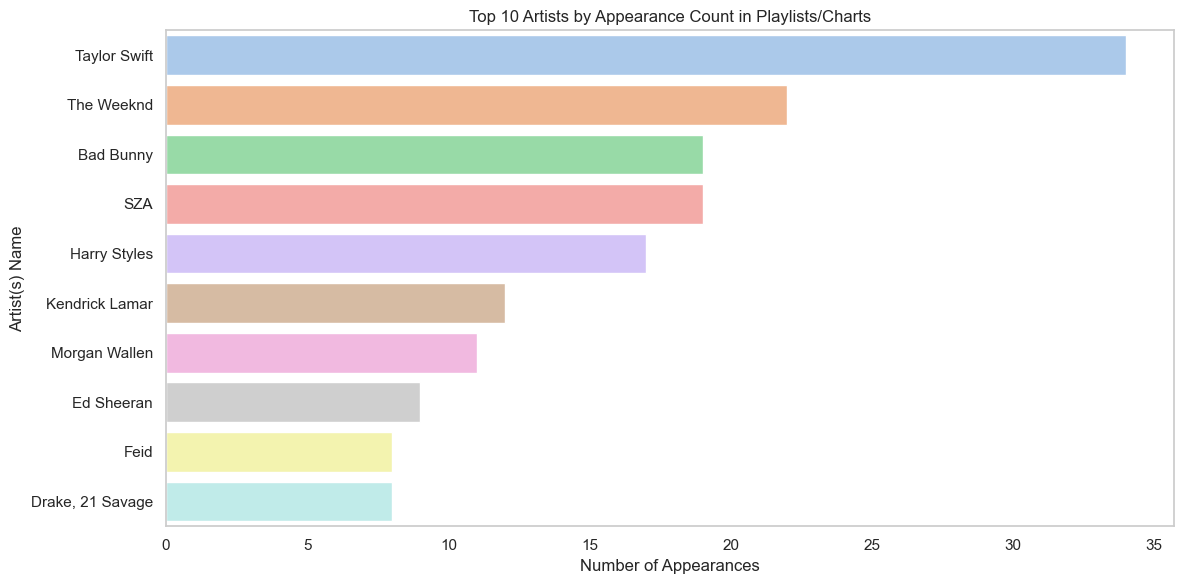

In [105]:
# Count the occurrences of each artist in the dataset
artist_counts = spotify_data['artist(s)_name'].value_counts().reset_index()

# Rename the columns
artist_counts.columns = ['artist(s)_name', 'appearance_count']

# Set the figure size for the plot
plt.figure(figsize=(12, 6))

# Create a bar plot for the top 10 artists by appearance count
sns.barplot(data=artist_counts.head(10), x='appearance_count', y='artist(s)_name', hue='artist(s)_name', palette='pastel', legend=False)

# Set the title of the plot
plt.title('Top 10 Artists by Appearance Count in Playlists/Charts')

# Label the x and y axes
plt.xlabel('Number of Appearances')
plt.ylabel('Artist(s) Name')

# Enable grid lines on the x-axis 
plt.grid(axis='x')

# Adjust layout to enhance the plot's appearance
plt.tight_layout()

# Display the results
plt.show()